In [1]:
## IMPORTS WHICH ARE REQUIRED FOR PROJECT 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
## Reading dataset 
df = pd.read_csv('Heart.csv')

In [3]:
## Information about dataset 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
## Describe data for each columns.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
## Shape of data (rows , columns)
df.shape

(303, 14)

In [6]:
## Information about data like count, data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
## To find any null values are there in dataset.
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
## Number of unique values in each column. 
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
## This is dependent or target variable for prediction, to check balance between two binary outputs.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of heart disease')

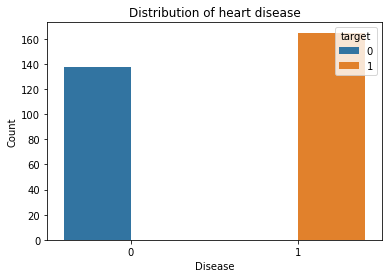

In [10]:
## Visualization of above data to check blance between two binary outouts.
sns.countplot(x='target', hue='target', data=df)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of heart disease')

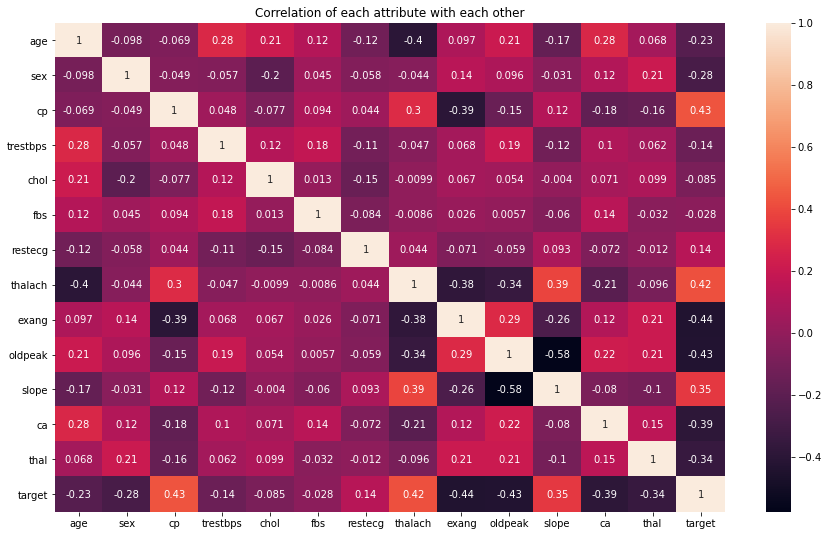

In [11]:
## Calculate correlation matrix to check correlation between attribute to each other.
## As we can see there is positive correlation between CP(Chect Pain) and target(Dependent variable)
plt.figure(figsize=(15,9))
plt.title('Correlation of each attribute with each other')
sns.heatmap(df.corr(),annot=True)

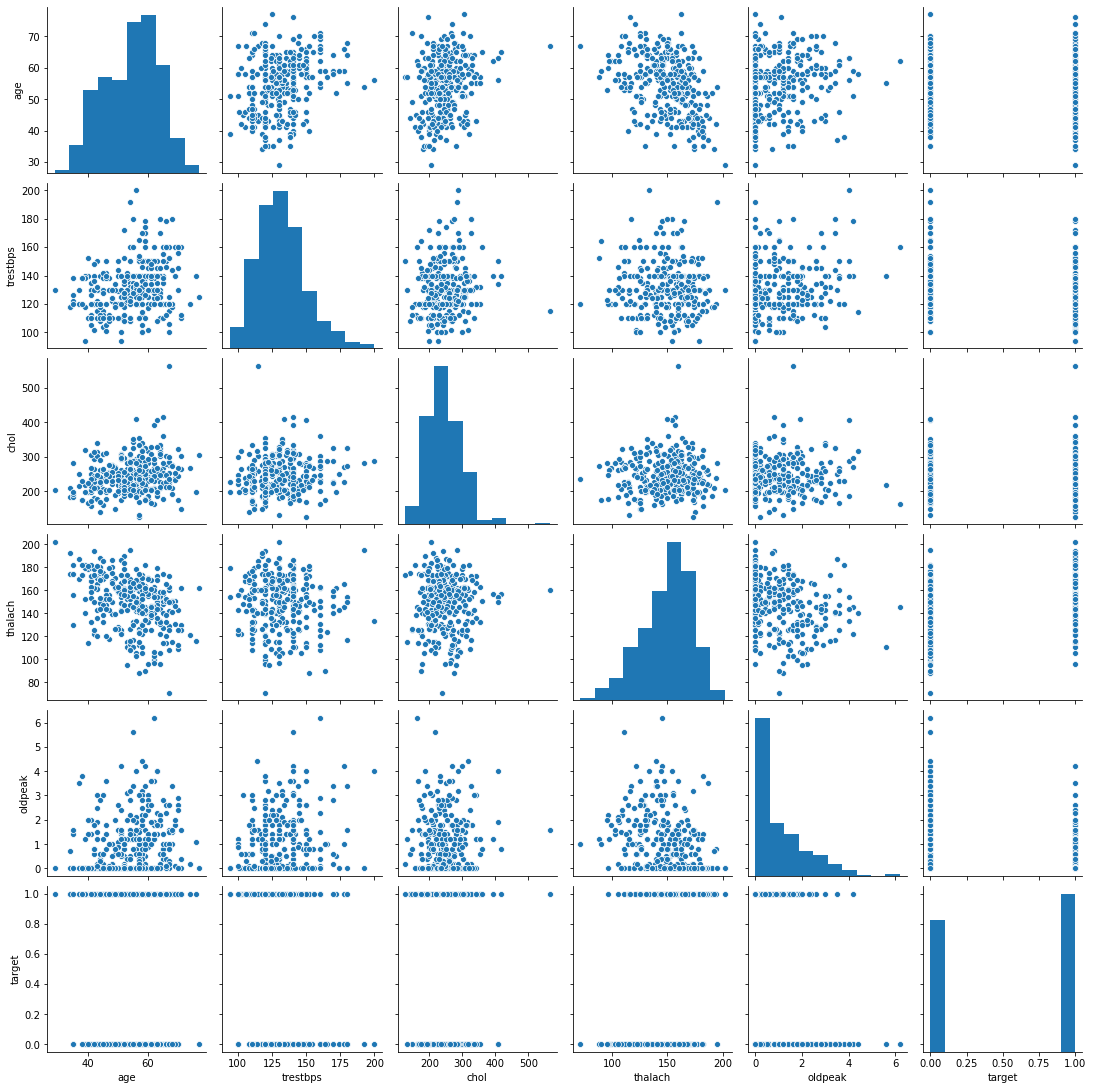

In [12]:
## Pairplot 
columns  = ['age','trestbps','chol','thalach','oldpeak','target']
data = df[columns]
sns.pairplot(data)

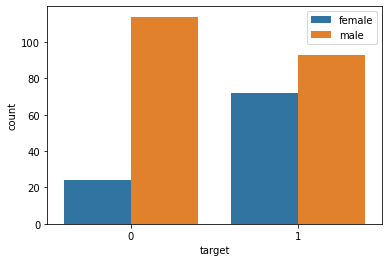

In [13]:
sns.countplot(x='target',data=df,hue='sex')
plt.legend(('female','male'))
plt.show()

Text(25.293515625000005, 0.5, 'ST depression')

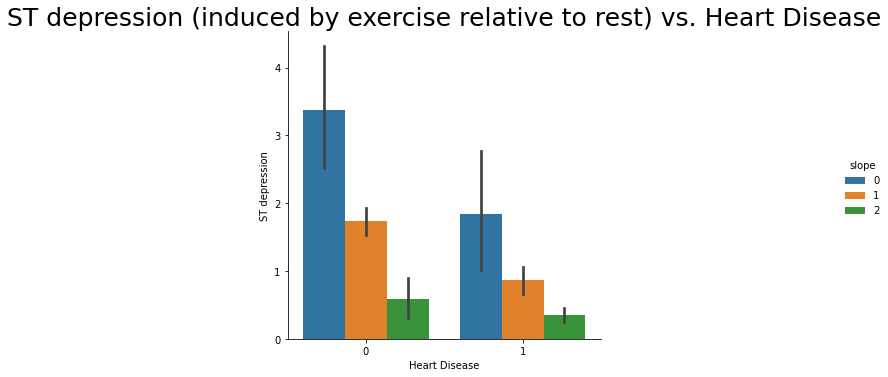

In [14]:
## ST depression vs Heart disease with slop
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease')
plt.ylabel('ST depression')

Text(0, 0.5, 'Thalach level')

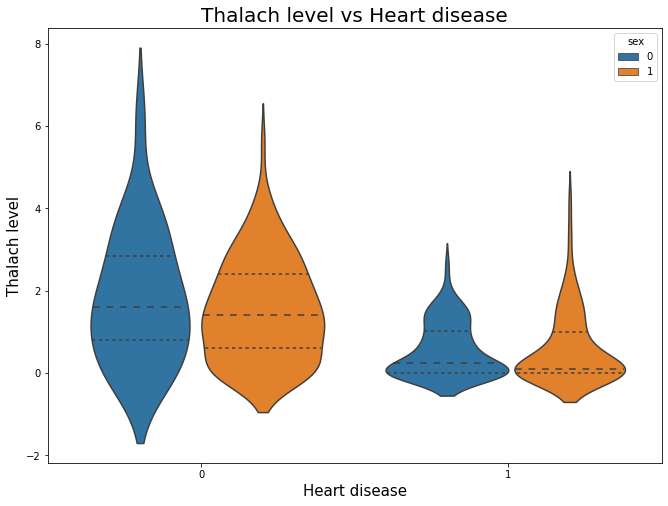

In [15]:
## Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, 
## while negative patients are between 1 & 3. In addition, we don’t see many differences between male & female target outcomes.
plt.figure(figsize=(11,8))
sns.violinplot(x='target', y='oldpeak', hue='sex', inner='quartile', data=df )
plt.title('Thalach level vs Heart disease',fontsize=20)
plt.xlabel('Heart disease', fontsize=15)
plt.ylabel('Thalach level', fontsize=15)


In [16]:
## Filtering data by positive heart disease patient.
pos_data = df[df['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [17]:
## Filtering data by negative heart disease patient.
neg_data = df[df['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [18]:
## ST depression for positive and negative patient 
print("Positive patient ST depression: " + str(pos_data['oldpeak'].mean()))
print("Negative patient ST depression: " + str(neg_data['oldpeak'].mean()))

Positive patient ST depression: 0.5830303030303029
Negative patient ST depression: 1.5855072463768118


In [19]:
## thalach for positive and negative patient 
print("Positive patient thalach: " + str(pos_data['thalach'].mean()))
print("Negative patient thalach: " + str(neg_data['thalach'].mean())) 

Positive patient thalach: 158.46666666666667
Negative patient thalach: 139.1014492753623


In [20]:
## one hot encoding(Create dummies for better prediction)
final_dataset = pd.get_dummies(df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_1      303 non-null    uint8  
 7   cp_1       303 non-null    uint8  
 8   cp_2       303 non-null    uint8  
 9   cp_3       303 non-null    uint8  
 10  fbs_1      303 non-null    uint8  
 11  restecg_1  303 non-null    uint8  
 12  restecg_2  303 non-null    uint8  
 13  exang_1    303 non-null    uint8  
 14  slope_1    303 non-null    uint8  
 15  slope_2    303 non-null    uint8  
 16  ca_1       303 non-null    uint8  
 17  ca_2       303 non-null    uint8  
 18  ca_3       303 non-null    uint8  
 19  ca_4       303 non-null    uint8  
 20  thal_1    

In [21]:
## Assign features to X(13 features) and y(predictor) 
X = final_dataset.drop('target',axis=1)
y = final_dataset['target']

In [22]:
## trial for accuracy 
X = df.drop('target', axis=1)
y = df['target']

In [23]:
## split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
## Model no.1 (LogisticRegression)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1)
model1.fit(X_train, y_train)

pred1 = model1.predict(X_test)
print (classification_report(y_test, pred1))
acc1 = accuracy_score(y_test, pred1)


              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# Model no.2 (K-Nearest Neighbors,KNN)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)
print (classification_report(y_test, pred2))
acc2 = accuracy_score(y_test, pred2)

              precision    recall  f1-score   support

           0       0.56      0.49      0.52        41
           1       0.62      0.68      0.65        50

    accuracy                           0.59        91
   macro avg       0.59      0.58      0.58        91
weighted avg       0.59      0.59      0.59        91



In [94]:
## Model no.3 (Support Vector Machine, SVM)

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

model3 = SVC(random_state=1)
model3.fit(X_train, y_train) 

pred3 = model3.predict(X_test)
print (classification_report(y_test, pred3))
acc3 = accuracy_score(y_test, pred3)

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        41
           1       0.63      0.74      0.68        50

    accuracy                           0.62        91
   macro avg       0.61      0.60      0.60        91
weighted avg       0.61      0.62      0.61        91



In [134]:
## Model no.4 (Naives Bayes Classifier)

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(X_train, y_train) 

pred4 = model4.predict(X_test) 
print (classification_report(y_test, pred4))
acc4 = accuracy_score(y_test, pred4)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.82      0.80      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [96]:
## Model no.5 (Decision Tree) 

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1)
model5.fit(X_train, y_train)

pred5 = model5.predict(X_test)
print (classification_report(y_test, pred5))
acc5 = accuracy_score(y_test, pred5)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91



In [135]:
## Model no.6 (Random Forest)

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)
model6.fit(X_train, y_train)

pred6 = model6.predict(X_test) 
print (classification_report(y_test, pred6))
acc6 = accuracy_score(y_test, pred6)

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.76      0.74      0.75        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91



In [140]:
## Model no.7 (XGBoost) 
##from sklearn.metrics import Classification_report
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(X_train, y_train)

pred7 = model7.predict(X_test)
print (classification_report(y_test, pred7))
acc7 = accuracy_score(y_test, pred7)

[15:28:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        41
           1       0.76      0.76      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



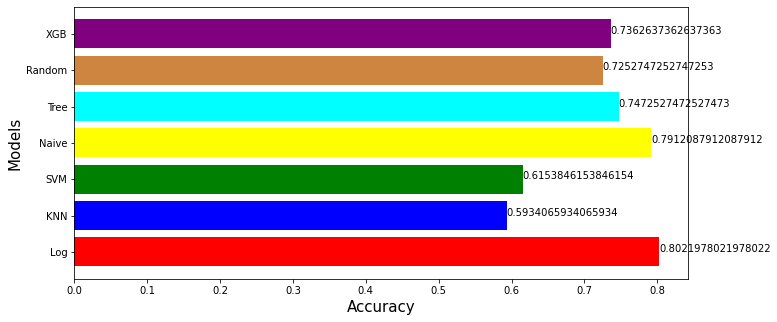

In [133]:
## Visual representation of accuracy of each machine learning algorithm
scores = [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
models = ['Log', 'KNN','SVM', 'Naive', 'Tree', 'Random', 'XGB']

plt.figure(figsize=(11,5))
plt.barh(models,scores,color = ['red', 'blue', 'green', 'yellow', 'cyan', 'peru', 'purple'])

for index, value in enumerate(scores):
    plt.text(value, index,str(value))
plt.xlabel('Accuracy', fontsize=15)
plt.ylabel('Models', fontsize=15)
  
plt.show()

In [147]:
## Making the Confusion Matrix for best machine learning model for this problem.

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred1)
print(cm) 
accuracy_score(y_test, pred1)

[[30 11]
 [ 7 43]]


0.8021978021978022